##4. Interpolation
Scipy, Krigging

In [1]:
# Installing cartopy: Method 1
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
#!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

import warnings
warnings.filterwarnings('ignore')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (126 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2)

In [2]:
import cartopy
import matplotlib.pyplot as plt
import pandas as pd


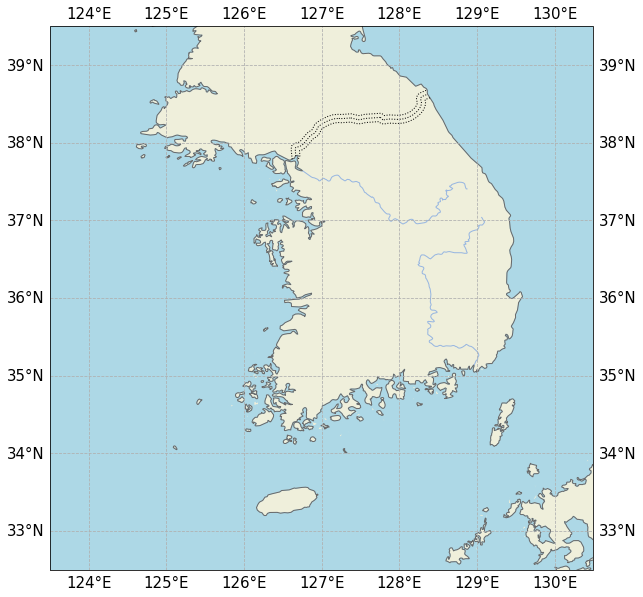

In [3]:
# Basic map: using cartopy

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

plt.show()

In [4]:
df = pd.read_csv('4_AirKorea_20191103_전국.csv', encoding='euc-kr')


In [5]:
df

,측정소코드,date,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,Latitude,Longitude
0,111121,11/2/2019,2019110213,0.005083,0.795833,0.009792,0.059292,67.291667,37.208333,서울 중구 덕수궁길 15,37.564263,126.974676
1,111122,11/2/2019,2019110213,0.006167,1.000000,0.009708,0.059333,68.583333,37.260870,서울 용산구 한강대로 405,37.549065,126.970466
2,111123,11/2/2019,2019110213,0.005083,0.812500,0.009083,0.054708,67.875000,37.250000,서울 종로구 종로35가길 19,37.572016,127.005008
3,111124,11/2/2019,2019110213,0.005708,0.945833,0.012083,0.059833,73.500000,42.625000,서울 중구 청계천로 184,37.568602,126.998168
4,111125,11/2/2019,2019110213,0.004667,0.741667,0.007667,0.055917,63.583333,31.458333,서울 종로구 종로 169,37.570877,126.996538
...,...,...,...,...,...,...,...,...,...,...,...,...
457,831154,11/2/2019,2019110213,0.009250,0.433333,0.009125,0.051667,94.125000,50.000000,경기 부천시 성오로 172,37.528025,126.796223
458,831155,11/2/2019,2019110213,0.008583,0.804167,0.007542,0.056208,77.916667,54.166667,경기 부천시 송내대로 262,37.506538,126.759193
459,831481,11/2/2019,2019110213,0.002358,0.408333,0.035083,0.012133,68.625000,31.166667,인천 강화군 삼산면 석모리,37.695553,126.333531
460,831491,11/2/2019,2019110213,0.004525,0.462500,0.036833,0.015008,60.833333,29.666667,인천 옹진군 덕적면 진리,37.231696,126.140593


In [6]:
df.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25,Latitude,Longitude
count,462.000000,4.620000e+02,445.000000,443.000000,446.000000,446.000000,443.000000,439.000000,462.000000,462.000000
mean,366355.584416,2.019110e+09,0.003841,0.607385,0.022189,0.028364,73.690543,35.831587,36.429634,127.588783
std,226274.259737,0.000000e+00,0.001830,0.162485,0.009628,0.015437,14.232510,9.641785,1.085630,0.930379
min,111121.000000,2.019110e+09,0.000554,0.208333,0.003292,0.002329,22.500000,5.608696,33.227771,124.633911
25%,131509.250000,2.019110e+09,0.002667,0.497917,0.015844,0.015875,64.000000,29.291667,35.486385,126.894054
50%,336127.500000,2.019110e+09,0.003375,0.600000,0.021208,0.025354,74.375000,35.958333,36.594691,127.211723
75%,534433.750000,2.019110e+09,0.004525,0.712500,0.027458,0.040719,84.020833,42.583333,37.448625,128.428624
max,831492.000000,2.019110e+09,0.014500,1.116667,0.062708,0.069292,119.791667,60.565217,38.378364,130.904106


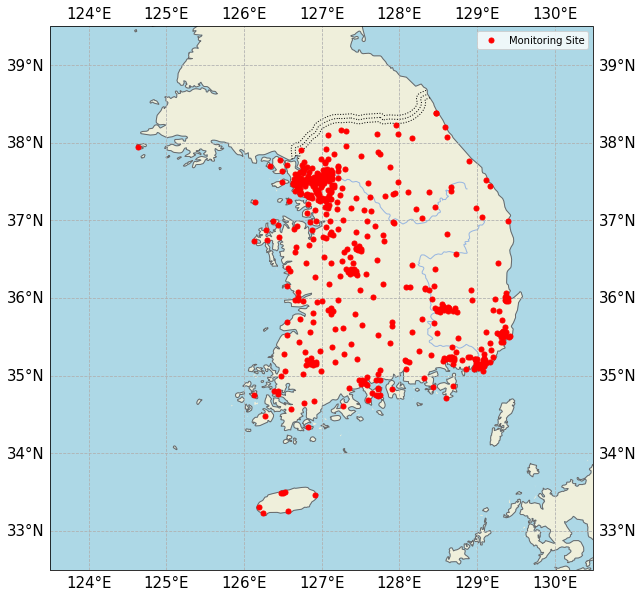

In [7]:
# Basic map: using cartopy

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

plt.plot(df['Longitude'],df['Latitude'],  color='red', marker='o', linestyle='None', markersize=5, label='Monitoring Site')
plt.legend()

plt.show()

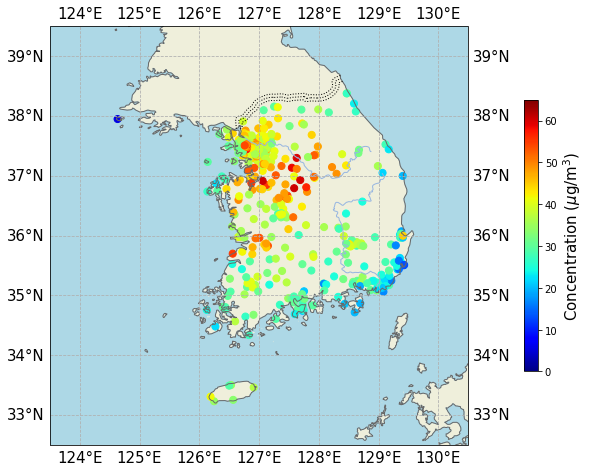

In [8]:

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

points = plt.scatter(df['Longitude'],df['Latitude'], c=df['PM25'],
                      vmin=0, vmax=65,
                      cmap='jet', s=50)
cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)

plt.show()

## Interpolation

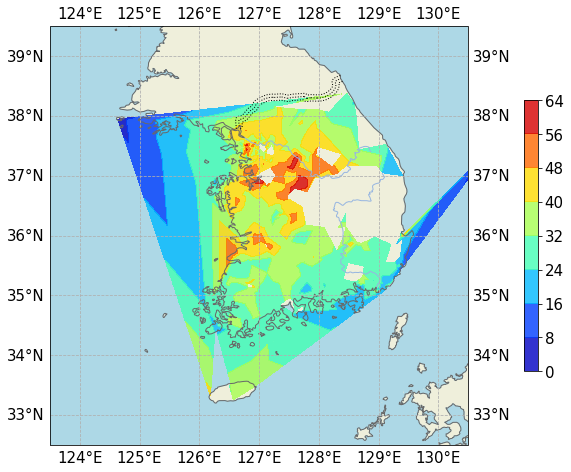

In [9]:
# Using Scipy
# 1. griddata

from scipy.interpolate import griddata
import numpy as np

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}


x, y, z = df['Longitude'], df['Latitude'], df['PM25']
xi = np.arange(x.min(), x.max(), 0.005)
yi = np.arange(y.min(), y.max(), 0.005)
xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),z,(xi,yi),method='linear') # linear, cubic, nearest

mapping = plt.contourf(xi,yi,zi, cmap='jet', alpha=0.8, vmin=0, vmax=65)
cb = plt.colorbar(mapping, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)
cb.ax.tick_params(labelsize=15)

ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.show()



In [10]:
%pip install pykrige
import pykrige

# PyKrige: https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/index.html

     |████████████████████████████████| 734 kB 29.7 MB/s 


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'power' Variogram Model
Scale: 65.52603504228419
Exponent: 0.36032539388229584
Nugget: 1.1202082368481914e-08 



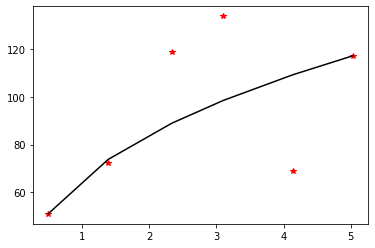

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [11]:
# 2. Ordinary Kriging

from pykrige.ok import OrdinaryKriging
df = df.dropna()
x, y, z = df['Longitude'], df['Latitude'], df['PM25']
xi = np.arange(x.min(), x.max(), 0.01)
yi = np.arange(y.min(), y.max(), 0.01)

OK = OrdinaryKriging(x, y, z, variogram_model="power", verbose=True, enable_plotting=True)
# Variogram model option: linear, power, spherical, gaussian, exponential
# Variogram model? -> needed to study about Kriging..
# https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/variogram_models.html

# Execute on grid:
zi, ss = OK.execute("grid", xi, yi)

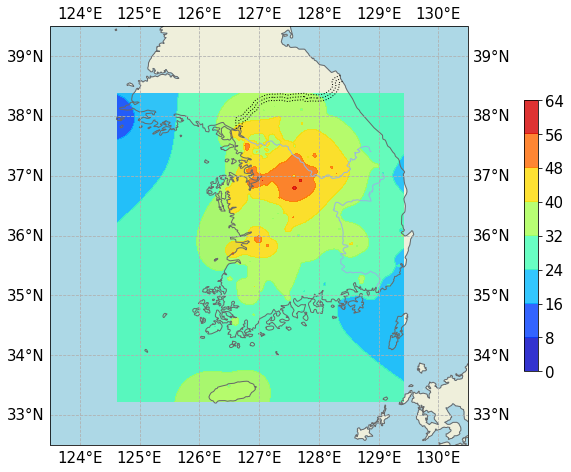

In [12]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

mapping = plt.contourf(xi,yi,zi, cmap='jet', alpha=0.8, vmin=0, vmax=65)
cb = plt.colorbar(mapping, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)
cb.ax.tick_params(labelsize=15)

ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.show()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'exponential' Variogram Model
Partial Sill: 113.43438437603396
Full Sill: 117.97177594419978
Range: 2.8687914319555454
Nugget: 4.53739156816581 



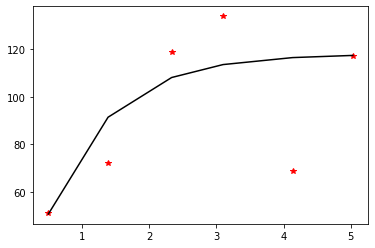

Calculating statistics on variogram model fit...
Q1 = 0.06001828760341456
Q2 = 2.141137230266845
cR = 40.724090912925064 

Initializing drift terms...
Executing Universal Kriging...



In [13]:
# 3. Universal Kriging

from pykrige.uk import UniversalKriging

UK = UniversalKriging(x, y, z, variogram_model="exponential", verbose=True, enable_plotting=True)

zi, ss = UK.execute("grid", xi, yi)

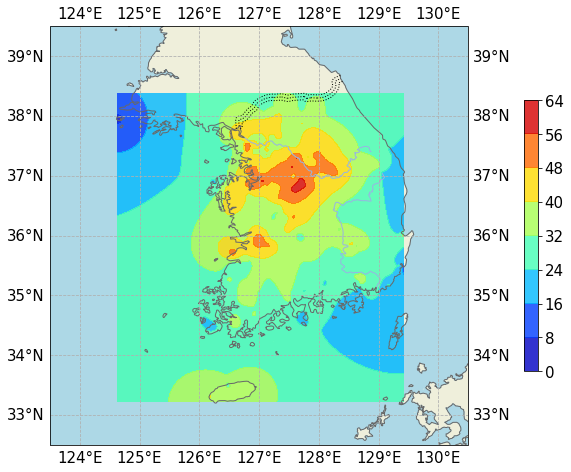

In [14]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

mapping = plt.contourf(xi,yi,zi, cmap='jet', alpha=0.8, vmin=0, vmax=65)
cb = plt.colorbar(mapping, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)
cb.ax.tick_params(labelsize=15)

ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.show()

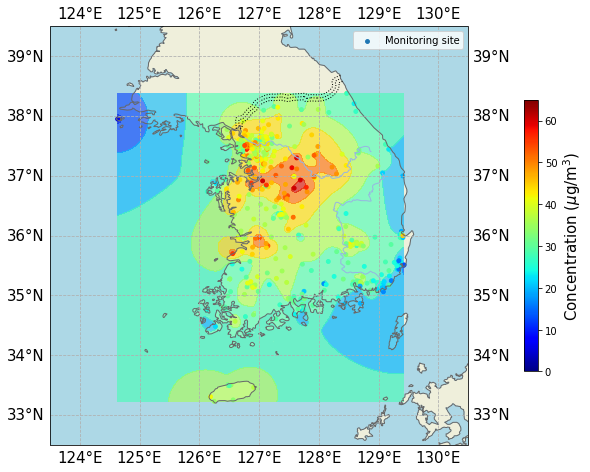

In [15]:
# Points with interpolation results

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}


mapping = plt.contourf(xi,yi,zi, cmap='jet', alpha=0.6, vmin=0, vmax=65)
cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

points = plt.scatter(df['Longitude'],df['Latitude'], c=df['PM25'],
                      vmin=0, vmax=65,
                      cmap='jet', s=15, label='Monitoring site')

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)

plt.legend()
ax.set_xlim(lon1, lon2)
ax.set_ylim(lat1, lat2)
plt.show()

In [16]:
# Option: 4. Using machine learning (e.g., kNN algoritm)

## Data preprocessing

df2 = df[['Longitude','Latitude','PM25']]

xi = np.arange(x.min(), x.max(), 0.025)
yi = np.arange(y.min(), y.max(), 0.025)

mesh = np.meshgrid(xi,yi)

df3 = pd.DataFrame()
df3['Longitude'] = mesh[0].flatten()
df3['Latitude'] = mesh[1].flatten()

df4 = df2.append(df3)

df4

,Longitude,Latitude,PM25
0,126.974676,37.564263,37.208333
1,126.970466,37.549065,37.260870
2,127.005008,37.572016,37.250000
3,126.998168,37.568602,42.625000
4,126.996538,37.570877,31.458333
...,...,...,...
39739,129.308911,38.377771,NaN
39740,129.333911,38.377771,NaN
39741,129.358911,38.377771,NaN
39742,129.383911,38.377771,NaN


In [17]:
# KNN imputing

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3) #KNN

Y= imputer.fit_transform(df4)

df4.iloc[:,:] = Y

df4

,Longitude,Latitude,PM25
0,126.974676,37.564263,37.208333
1,126.970466,37.549065,37.260870
2,127.005008,37.572016,37.250000
3,126.998168,37.568602,42.625000
4,126.996538,37.570877,31.458333
...,...,...,...
39739,129.308911,38.377771,29.125000
39740,129.333911,38.377771,29.125000
39741,129.358911,38.377771,26.083333
39742,129.383911,38.377771,26.083333


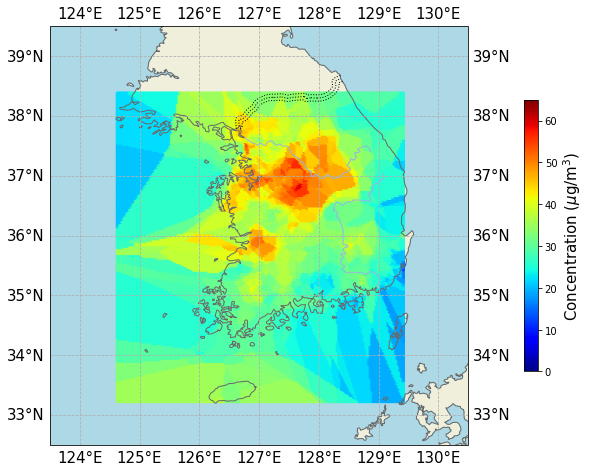

In [18]:
# Plotting


plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='dimgray')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

lon1, lon2, lat1, lat2 = 123.5, 130.5, 32.5, 39.5
ax.set_extent([lon1, lon2, lat1, lat2], crs=cartopy.crs.PlateCarree())
gl = ax.gridlines(draw_labels=True, crs=cartopy.crs.PlateCarree(), linestyle='--')
gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

points = plt.scatter(df4['Longitude'],df4['Latitude'], c=df4['PM25'],
                      vmin=0, vmax=65,
                      cmap='jet', s=8)
cb = plt.colorbar(points, orientation='vertical', ticklocation='auto', shrink=0.5, pad=0.1)

cb.set_label(label='Concentration (' + "${\mu}$" + 'g/m' + r'$^3$' + ')', size=15)

plt.show()